<a href="https://colab.research.google.com/github/gihuni99/Basic_MLDL/blob/main/Ch03_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering & Regularization

### Multiple Regression

**Multiple Regression**: 여러 개의 특성을 사용한 선형 회귀

이전에는 1개의 feature(length)를 사용하여 target을 예측하여 직선을 학습하는 Linear Regression

2개의 feature를 사용하여 학습하면 평면을 학습한다->Multiple Regression

식) **target= feature1 x W1 + feature2 x W2 + bias**

이번 예제에서는 농어의 길이, 높이, 두께를 Feature로 사용할 것이다.

**Feature Engineering**: 서로 다른 feature들을 사용하여 새로운 feature를 만들어 내는 것. 예를 들어 '농어 길이 x 농어 높이'를 하나의 새로운 feature로 만드는 것이다.

### 데이터 준비

이전까지는 데이터를 손으로 쓰거나, 복사 붙여넣기를 해왔다. 하지만 이것은 데이터가 적을 때 가능하다. 만약 데이터 양이 방대하다면 새로운 방식이 필요하다.(Download)

 따라서 이 때 사용하는 것이 **Pandas**이다.

**Pandas**: 유명한 데이터 분석 라이브러리이다. *Dataframe*은 pandas의 핵심 데이터 구조이다. Numpy와 비슷하게 n-dimension array를 다룰 수 있고, 더 많은 기능을 제공한다. Dataframe은 numpy array로 쉽게 변환 가능하다.

pandas를 사용해 농어의 데이터를 인터넷에서 다운받아 dataframe에 저장하자. 구 후 numpy array로 변환하여 training을 진행한다.

pandas dataframe을 만들기 위해 가장 많이 사용하는 파일은 **CSV**파일이다.

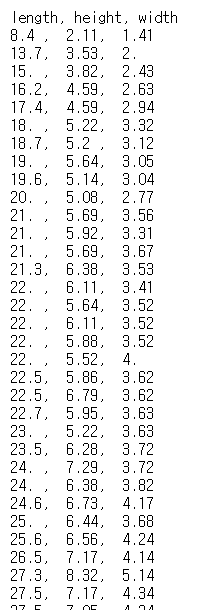

CSV파일은 위 사진과 같이 '**,**'로 나뉘어져 있는 text 파일이다.

pandas에서 읽는 방식은 pandas의 **read_csv()**함수의 주소를 넣으면 끝난다.

read_csv()함수로 dataframe을 만든 후, to_numpy() method를 사용하여 numpy array로 변환해준다. 코드는 아래와 같다.

In [ ]:
import pandas as pd
df=pd.read_csv('https://bit.ly/perch_csv_data') #csv파일의 주소를 통해 dataframe을 만들고
perch_full=df.to_numpy()# to_numpy() method를 통해 dataframe을 numpy배열로 변환
print(perch_full)

target data는 이전과 동일한 방식으로 준비

In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

train_test_split을 사용하여 train, test set을 나누어준다.

**주의) train_test_split은 sklearn.model_selection 아래에 있다.**

In [ ]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(perch_full,perch_weight,random_state=42)

### Scikit-Learn Transformer

Scikit-Learn은 feature를 만들거나 pre-processing을 하기 위한 다양한 클래스를 제공한다. 이러한 클래스를 Scikit-Learn에서는 **Transformer**라고 한다.

+) 앞서 나온 LinearRegression 같은 model클래스는 Estimator라고도 부른다.

예제에서 사용할 Transformer는 **PolynomialFeatures** 클래스이다. 이 클래스는 **sklearn.preprocessing**에 포함되어 있다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

**Polynomial**에 대한 예제

* fit(): 새롭게 만들 feature 조합을 찾는다.(transform()을 하기 전에 training을 해야함)
* transform(): 실제로 데이터를 변환

아래 fit() method를 보면 input data만 존재하고, target data는 존재하지 않는 것을 볼 수 있다. **transform()**은 input data를 변환하는데, target data가 필요하지 않다.

In [ ]:
poly=PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

위 결과를 보면 transform() method를 통해 feature가 많아진 것을 볼 수 있다.

PolynomialFeatures 클래스는 각 특성의 제곱값과 특성끼리 곱한 값을 추가한다.

+) 위에서 '1'이 있는 이유는

무게 = a x 길이 + b x 높이 + c x 두께 + d x 1 의 식에서 bias값이 d에 곱해지는 값이다. 따라서 feature는 (길이, 높이, 두께, 1)이라고 볼 수 있다. 하지만 scikit-learn의 Linear model은 자동으로 bias가 추가되므로 특성 '1'을 추가하지 않아도 된다.-> **include_bias=False**로 지정(꼭 하지 않아도 자동으로 bias의 feature를 무시하지만, 명시적으로 나타내기 위함)

In [ ]:
poly=PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

이제 위 예시처럼 실제 데이터에 적용해보자

아래 결과에서 transform()을 사용하여 총 9개의 Feature가 있는 것을 볼 수 있다.

In [ ]:
poly=PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
print(train_poly.shape)

원래의 feature가 길이, 높이, 두께 3개였는데, 나머지 6개가 어떻게 생성되었는지 확인할 수 있다.

PolynomialFeatures 클래스는 **get_feature_names_out()** method를 호출하여 각각의 특성이 어떤 feature들의 조합으로 만들어졌는지 알 수 있다.

In [ ]:
print(poly.get_feature_names_out())

위 처럼 각 feature의 조합을 알 수 있다. 이제 test set을 변환해보자.

+) PolynomialFeatures 클래스는 fit() method에서 만들 특성의 조합을 준비하기만 할 뿐, 통계값을 구하지 않는다. 따라서 test_input을 fit()에 학습시켜 변환해도 되지만, 항상 train set을 기준으로 test set을 변환하는 습관을 들이는 것이 좋다.

In [ ]:
test_poly=poly.transform(test_input)

### Multiple Regression Model Training

Multiple Regression Model을 학습시키는 것은 여러개의 feature를 사용한다는 것이 다를 뿐 Linear Regression과 동일하다.

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_poly,train_target) #feature를 추가한 train_poly를 이용하여 학습시킨다.(feature는 9개)

아래 결과를 통해 train set에 대한 score가 높아졌음을 알 수 있다. 또한 test set에 대한 score는 변화가 없지만, Underfitting문제는 해결되었음을 알 수 있다.

In [ ]:
print(lr.score(train_poly,train_target))

In [ ]:
print(lr.score(test_poly,test_target))

만약 feature를 더 많이 추가한다면 어떻게 될까? 결과를 확인하기 위해 5제곱 feature까지 만들어보자

PolynomialFeatures 클래스는 **degree** parameter를 사용하여 필요한 고차항의 최대 차수를 정할 수 있다.

In [ ]:
poly=PolynomialFeatures(degree=5,include_bias=False) #최대 차수는 5

poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)
print(test_poly.shape)

위 결과를 통해 feature가 총 55개인 것을 알 수 있다.(column의 수가 feature의 수)

해당 feature를 통해 다시 모델을 학습시켜보자

In [ ]:
lr.fit(train_poly,train_target)

아래 결과에서 train set의 결과는 매우 좋다. 하지만 test set의 결과는 매우 큰 음수가 나온다.

Feature 수가 많아질수록 Linear model은 매우 강력해진다. 즉 train set에 대해 거의 완벽하게 학습이 되는 것이다. 하지만 이렇게 되면 **Overfitting**이 발생한다.(weight들이 train set을 너무 잘 표현하기 때문)

따라서 test set에 대한 결과는 매우 좋지 않은 것이다.

In [ ]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

훈련에 사용한 sample은 총 42개이다. 그런데 feature가 55개라면 완벽하게 학습이 될 수 밖에 없다. 예시로 어떤 42마리의 참새를 맞추기 위해 딱 한 번 총을 쏴야한다면 참새 떼 정중앙을 겨냥하여 가능한 맞출 가능성을 높일 것이다. 하지만 55번 쏠 수 있다면 한번에 하나씩 모든 참새를 맞출 수 있다.

이처럼 overfitting을 줄이는 방법을 **Regularization**이라고 한다.

### Regularization

**Regularization**: 모델이 Train set을 과도하게 학습하지 못하도록, 즉 Overfitting이 발생하지 않도록 만드는 것

Linear model의 경우 Feature에 곱해지는 계수(기울기), 즉 weight의 크기를 작게 하는 것.

feature의 Scale이 normalization되지 않으면 weight가 잘 적용되지 않는다.(예시로 이전 문제의 무게와 길이 단위차로 인한 부정확한 결과)

따라서 regularization을 적용하기 전, normalization을 해주어야 한다. 이전 예시에서는 mean과 standard deviation을 직접 계산하여 **standard score**을 구해 적용하였다. 이번 예제에서는 scikit-learn의 StandardScaler 클래스를 활용하겠다.

**StandardScaler** 클래스의 객체 ss를 초기화한 후 PolynomialFeatures 클래스로 만든 train_poly 데이터를 통해 ss를 Training시킨다.

주의) train set으로 학습시킨 transform을 통해 test set을 변환해야 한다.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

Linear Regression 모델에 Regularization을 추가한 모델을 **ridge(L2 Regression)**와 **lasso(L1 Regression)**라고 한다.

* **ridge(L2 Regression)**: 계수를 제곱한 값을 기준으로 규제를 적용

* **lasso(L1 Regression)**: 계수의 절대값을 기준으로 규제를 적용

### Ridge(L2) Regression

Ridge와 Lasso regression 모두 **sklearn.linear_model 패키지 안에 있다.

이전과 동일하게 fit()로 학습시키고, score()로 평가

이전에 만든 train_scaled 데이터로 ridge 모델 training

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))

결과를 통해 train set의 정확도는 낮아졌지만, test set의 정확도는 음수값에서 정상적으로 돌아온 것을 볼 수 있다. 많은 feature를 사용했지만, Overfitting되지 않아 test set에서 좋은 성능을 보인다.

In [ ]:
print(ridge.score(test_scaled,test_target))

ridge와 lasso 모델은 regularization의 정도를 조절할 수 있다. **alpha** 변수를 통해 조절 가능하다.

alpha값의 크기에 따라 Overfitting과 Underfitting을 조절할 수 있다.

이때, **alpha**값은 hyperparameter라고 부른다. 이는 모델이 학습하는 것이 아니라 사람이 지정해주어야 하는 값이다.

적절한 alpha값을 찾는 방법은 alpha에 대한 $R^2$(평가지표)그래프를 그려보는 것이다.

train set과 test set의 score가 가장 가까운 지점이 최적의 alpha값이다.

먼저 alpha값을 바꿀 때마다 score() method의 결과를 저장할 list를 만든다.

In [ ]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

그 다음 alpha값을 0.001에서 100까지 10배씩 늘리면서 ridge regression 모델을 training시키고, 각 모델에 대한 score값을 list에 저장한다.

In [ ]:
alpha_list=[0.001,0.01,0.1,1,10,100] #alpha값으로 지정해줄 값을 저장한 list
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha) #alpha값을 변경하며 모델 학습
    ridge.fit(train_scaled,train_target) #train set에 대해 학습
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

위에서 alpha값이 다른 각 모델들을 학습시키고, 그에 대한 score값을 list에 저장했다. 이를 그래프로 그려보자.

alpha값을 0.001부터 10배씩 증가시켰기 때문에 그래프의 간격이 일정하지 않다.(왼쪽이 매우 촘촘하다.)

따라서 alpha_list의 값을 로그함수로 바꾸어 지수 표현을 사용하겠다.(즉, 0.001은 -3, 0.01은 -2가 되는 것)

In [ ]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

위 결과를 보면 그래프이 왼쪽은 Overfitting이 발생했고, 오른쪽은 train set의 결과도 내려가는 Underfitting이 발생했다.

따라서 가장 적절한 alpha값은 두 그래프가 가장 가깝고 test set의 점수가 가장 높은 -1, 즉 0.1이 가장 적합하다.

아래 결과를 보면 alpha값을 통해 regularization을 적절하게 활용하여 Overfitting과 Underfitting을 방지한 것을 알 수 있다.

In [ ]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

### Lasso(L1) Regression

Lasso 모델은 ridge를 training하는 것과 매우 유사하다.(**Ridge**클래스를 **Lasso**클래스로 바꾸는 것이 전부)

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

결과를 통해 Overfitting이 발생하지 않고, 정상적으로 training된 것을 볼 수 있다.

동일하게 lasso model의 적절한 alpha값을 찾아보자

In [ ]:
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    #lasso 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정된 반복 횟수가 부족할 때 경고 발생(방지하기 위해 max_iter=10000을 설정)
    lasso=Lasso(alpha=alpha,max_iter=10000)
    lasso.fit(train_scaled,train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

In [ ]:
plt.plot(np.log10(alpha_list),train_score) #np.log10은 numpy에서 제공하는 log함수
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

위 결과를 보면 왼쪽은 Overfitting, 오른쪽은 Underfitting이 발생하는 것을 볼 수 있다.(최적의 alpha값은 1, 즉 10이다)

In [ ]:
lasso=Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

위 결과에서 많은 feature들을 사용했음에도 overfitting이 발생하지 않은 것을 볼 수 있다.

lasso모델은 weight값을 0으로 만들 수 있다. lasso model의 weight는 coef_ 속성에 저장되어 있다.

In [ ]:
print(np.sum(lasso.coef_==0))

np.sum()함수는 배열을 모두 더한 값을 반환한다. numpy배열에 비교연산자를 사용했을 떄, 각 원소는 True(1) 또는 False(0)이 되어 연산한다. 따라서 coef_중 0인 값을 셀 수 있는 것이다.

위 결과를 보면 weight 40개가 0이 된 것을 볼 수 있다. 즉 55개의 feature 중 15개만을 사용하는 것이다.

이처럼 lasso 모델을 사용하여 유용한 feature를 골라낼 수 있다.

### 추가공부

**Pandas**
* **read_csv()**: csv파일을 로컬 컴퓨터나 인터넷에서 읽어, pandas dataframe으로 변환하는 함수. read_csv()함수는 많은 parameter를 제공한다. sep는 csv파일의 구분자를 지정(기본값은 콤마(,)), header는 dataframe의 column 이름으로 사용할 csv파일의 row 번호를 지정(기본값은 첫 번째 row를 column 이름으로 사용, skiprows는 파일에서 읽기 전에 건너뛸 행의 개수를 지정, nrows는 파일에서 읽을 행의 개수를 지정

**scikit-learn**

* **PolynomialFeatures**: 주어진 Feature들을 조합하여 새로운 Feature를 만든다. degree는 최고차수 지정(기본값은 2), interaction_only가 True이면 거듭제곱 항은 제외되고 feature간 곱셈 항만 추가(기본값은 False), include_bias가 False이면 bias를 위한 feature를 추가하지 않음(기본값은 True)

* **Ridge**: Regularization이 있는 Regression 알고리즘. 'alpha' parameter로 regularization 강도를 조절(기본값은 1), solver로 최적의 모델을 찾기 위한 방법을 지정할 수 있음(기본값은 'auto', 데이터에 따라 자동으로 선택됨)('sag'는 확률적 평균 경사 하강법 알고리즘(SGD)로 feature와 sample이 많을 때 성능이 좋다, 'saga'는 'sag'의 개선 버전), random_state는 solver가 'sag' 또는 'saga'일 때 numpy 난수 시드값을 지정할 수 있다.

* **Lasso**: Regularization이 있는 Regression 알고리즘. Lasso 클래스는 최적의 모델을 찾기 위해 좌표축을 따라 Optimization을 수행하는 coordinate descent(좌표 하강법)을 사용. alpha와 random_state는 Ridge클래스와 동일, max_iter는 알고리즘의 수행 반복 횟수를 지정(기본값은 1000)